# Isling Model

In [51]:
from ising import Ising
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [52]:
# Initialise Variables
L, B, J, beta = 100, -0.05, 0.5, 1

num_therm = 100

b_num = 50

mag_per_spin_arr = np.zeros(num_therm)
visual_arr = []

# Initialise the Ising Model with the Constants

In [53]:
ising = Ising(L,J,B, beta)


In [54]:
def calculate_running_average(arr, n):
    return np.convolve(arr, np.ones((n))/n, mode='valid')

def flatten_point(running_avg, threshold):
    diff = np.diff(running_avg)
    flatten_point = np.where(np.abs(diff) < threshold)[0]
    if flatten_point.size > 0:
        return flatten_point[0]
    else:
        return len(running_avg)



rav = calculate_running_average(mag_per_spin_arr, 5)
threshold = 0.01
fp = flatten_point(rav, threshold)

## Check Average Mag per Spin with varying J


In [55]:
j_vals = np.linspace(-1,1,10)
b_vals = np.linspace(-1,1,b_num)
avg_mags = np.zeros(len(b_vals)) # Initialize avg_mags as a 2D array
spec_head_cap_arr = np.zeros(len(b_vals))
succeptibility_arr = np.zeros(len(b_vals)
avg_mags_err = np.zeros((len(j_vals), len(b_vals)))

i = 0
for k, b in enumerate(b_vals):
    if k ==0:
        ising = Ising(L,J,b, beta)
    ising.update_magnetic_field(b)
    for l in range(num_therm):
        ising.do_thermalisation_sweep()
        mag_per_spin_arr[l] = ising.get_mag_per_spin()
    # mag_per_spin_arr = np.array([ising.do_thermalisation_sweep() or ising.get_mag_per_spin() for _ in range(num_therm)])
    rav = calculate_running_average(mag_per_spin_arr, 3)
    fp = flatten_point(rav, threshold)
    avg_mags[k] = mag_per_spin_arr[-1]  # Store the average magnetisation in the 2D array
    # avg_mags_err[i, k] = np.std(mag_per_spin_arr[fp:])/np.sqrt(len(mag_per_spin_arr[fp:])) # Store the average magnetisation in the 2D array
    i += 1
    print(i)
    print(f'j: {J}, b: {b}, avg_mag: {avg_mags[k]}')

1
j: 0.5, b: -1.0, avg_mag: -0.9932
2
j: 0.5, b: -0.9591836734693877, avg_mag: -0.9932
3
j: 0.5, b: -0.9183673469387755, avg_mag: -0.9948
4
j: 0.5, b: -0.8775510204081632, avg_mag: -0.9936
5
j: 0.5, b: -0.8367346938775511, avg_mag: -0.9922
6
j: 0.5, b: -0.7959183673469388, avg_mag: -0.9896
7
j: 0.5, b: -0.7551020408163265, avg_mag: -0.9908
8
j: 0.5, b: -0.7142857142857143, avg_mag: -0.9914
9
j: 0.5, b: -0.6734693877551021, avg_mag: -0.9902
10
j: 0.5, b: -0.6326530612244898, avg_mag: -0.9872
11
j: 0.5, b: -0.5918367346938775, avg_mag: -0.9864
12
j: 0.5, b: -0.5510204081632654, avg_mag: -0.984
13
j: 0.5, b: -0.5102040816326531, avg_mag: -0.985
14
j: 0.5, b: -0.4693877551020409, avg_mag: -0.981
15
j: 0.5, b: -0.4285714285714286, avg_mag: -0.9824
16
j: 0.5, b: -0.3877551020408164, avg_mag: -0.9804
17
j: 0.5, b: -0.34693877551020413, avg_mag: -0.9816
18
j: 0.5, b: -0.30612244897959184, avg_mag: -0.9746
19
j: 0.5, b: -0.26530612244897966, avg_mag: -0.9734
20
j: 0.5, b: -0.22448979591836737, 

[-0.9932 -0.9932 -0.9948 -0.9936 -0.9922 -0.9896 -0.9908 -0.9914 -0.9902
 -0.9872 -0.9864 -0.984  -0.985  -0.981  -0.9824 -0.9804 -0.9816 -0.9746
 -0.9734 -0.9672 -0.9634 -0.9596 -0.951  -0.9342 -0.9136 -0.9036  0.93
  0.9492  0.9542  0.9578  0.97    0.97    0.9748  0.9748  0.9788  0.9804
  0.9826  0.9872  0.987   0.9878  0.9908  0.9884  0.9908  0.9902  0.9916
  0.9946  0.9938  0.9956  0.9942  0.9938]


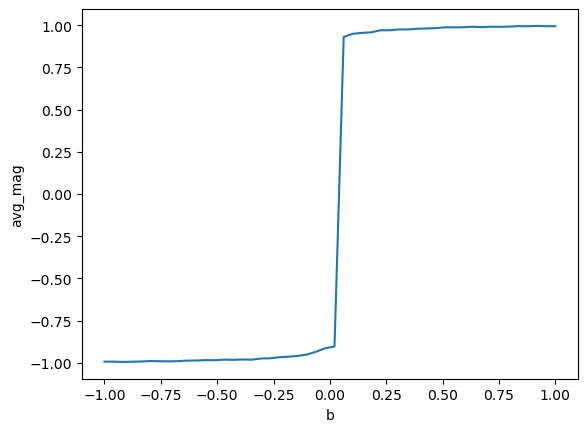

In [56]:
# np.save('avg_mags_for_varying_b', avg_mags)
# np.save('avg_mags_err_for_varying_b', avg_mags_err)

# Plot average magnetisation per spin against b vals with error bars
plt.figure()
plt.plot(b_vals, avg_mags)
plt.xlabel('b')
plt.ylabel('avg_mag')
print(avg_mags)


In [57]:
j_vals = np.linspace(-1,1,10)
b_vals_dec = np.linspace(1,-1,b_num)
avg_mags_dec = np.zeros(len(b_vals)) # Initialize avg_mags as a 2D array
avg_mags_err = np.zeros((len(j_vals), len(b_vals)))
np.flip(b_vals)
i = 0
for k, b in enumerate(b_vals_dec):
    if k ==0:
        ising = Ising(L,J,b, beta)
    ising.update_magnetic_field(b)
    for l in range(num_therm):
        ising.do_thermalisation_sweep()
        mag_per_spin_arr[l] = ising.get_mag_per_spin()
    # mag_per_spin_arr = np.array([ising.do_thermalisation_sweep() or ising.get_mag_per_spin() for _ in range(num_therm)])
    rav = calculate_running_average(mag_per_spin_arr, 3)
    fp = flatten_point(rav, threshold)
    avg_mags_dec[k] = mag_per_spin_arr[-1]  # Store the average magnetisation in the 2D array
    # avg_mags_err[i, k] = np.std(mag_per_spin_arr[fp:])/np.sqrt(len(mag_per_spin_arr[fp:])) # Store the average magnetisation in the 2D array
    i += 1
    print(i)
    print(f'j: {J}, b: {b}, avg_mag: {avg_mags_dec[k]}')

1
j: 0.5, b: 1.0, avg_mag: 0.9946
2
j: 0.5, b: 0.9591836734693877, avg_mag: 0.9924
3
j: 0.5, b: 0.9183673469387755, avg_mag: 0.993
4
j: 0.5, b: 0.8775510204081632, avg_mag: 0.993
5
j: 0.5, b: 0.8367346938775511, avg_mag: 0.9918
6
j: 0.5, b: 0.7959183673469388, avg_mag: 0.9932
7
j: 0.5, b: 0.7551020408163265, avg_mag: 0.993
8
j: 0.5, b: 0.7142857142857143, avg_mag: 0.99
9
j: 0.5, b: 0.6734693877551021, avg_mag: 0.992
10
j: 0.5, b: 0.6326530612244898, avg_mag: 0.9902
11
j: 0.5, b: 0.5918367346938775, avg_mag: 0.9822
12
j: 0.5, b: 0.5510204081632654, avg_mag: 0.9846
13
j: 0.5, b: 0.5102040816326531, avg_mag: 0.9856
14
j: 0.5, b: 0.4693877551020409, avg_mag: 0.9814
15
j: 0.5, b: 0.4285714285714286, avg_mag: 0.981
16
j: 0.5, b: 0.3877551020408164, avg_mag: 0.9752
17
j: 0.5, b: 0.34693877551020413, avg_mag: 0.9764
18
j: 0.5, b: 0.30612244897959184, avg_mag: 0.975
19
j: 0.5, b: 0.26530612244897966, avg_mag: 0.9682
20
j: 0.5, b: 0.22448979591836737, avg_mag: 0.9676
21
j: 0.5, b: 0.183673469387

[-0.9932 -0.9932 -0.9948 -0.9936 -0.9922 -0.9896 -0.9908 -0.9914 -0.9902
 -0.9872 -0.9864 -0.984  -0.985  -0.981  -0.9824 -0.9804 -0.9816 -0.9746
 -0.9734 -0.9672 -0.9634 -0.9596 -0.951  -0.9342 -0.9136 -0.9036  0.93
  0.9492  0.9542  0.9578  0.97    0.97    0.9748  0.9748  0.9788  0.9804
  0.9826  0.9872  0.987   0.9878  0.9908  0.9884  0.9908  0.9902  0.9916
  0.9946  0.9938  0.9956  0.9942  0.9938]


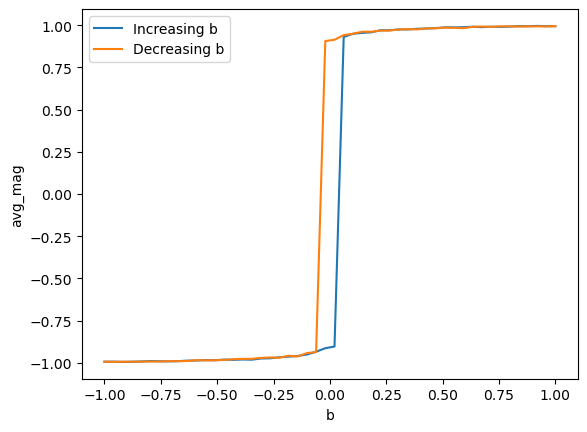

In [58]:
plt.figure()
plt.plot(b_vals, avg_mags, label='Increasing b')
plt.plot(b_vals_dec, avg_mags_dec, label='Decreasing b')
plt.xlabel('b')
plt.ylabel('avg_mag')
print(avg_mags)
plt.legend()